# Predicción a mitad de temporada de puntos finales y clasificación final

---



## Importar librerias de Python

In [0]:
import numpy as np
import pandas as pd

## Dataset

Variables
* **temp**: Temporada
* **eqp**: Equipo
* **pos**: Posición (Jornada 19) 
* **pg**: Partidos Ganados (Jornada 19)
* **pe**: Partidos Empatados (Jornada 19)
* **pp**: Partidos Perdidos (Jornada 19)
* **gf**: Goles a Favor (Jornada 19)
* **gc**: Goles en Contra (Jornada 19)
* **pts**: Puntos (Jornada 19)
* **pos38**: Posición final (Jornada 38) 
* **pts38**: Puntos finales (Jornada 38)
* **top4**: Clasificado entre los 4 primeros

In [2]:
dataset = pd.read_csv('Resultados.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
temp     40 non-null int64
eqp      40 non-null object
pos      40 non-null int64
pg       40 non-null int64
pe       40 non-null int64
pp       40 non-null int64
gf       40 non-null int64
gc       40 non-null int64
pts      40 non-null int64
pos38    40 non-null int64
pts38    40 non-null int64
top4     40 non-null int64
dtypes: int64(11), object(1)
memory usage: 3.9+ KB


In [3]:
datasetRMA = dataset[dataset.eqp == "RMA"]
datasetRMA

,temp,eqp,pos,pg,pe,pp,gf,gc,pts,pos38,pts38,top4
0,2019,RMA,4,10,3,6,28,24,33,3,68,1
1,2018,RMA,4,10,5,4,35,18,35,3,76,1
2,2017,RMA,1,13,4,2,49,19,43,1,93,1
3,2016,RMA,3,12,4,3,52,18,40,2,90,1
4,2015,RMA,1,16,0,3,64,16,48,2,92,1
5,2014,RMA,3,15,2,2,53,21,47,3,87,1
6,2013,RMA,3,11,4,4,45,20,37,2,85,1
7,2012,RMA,1,16,1,2,67,18,49,1,100,1
8,2011,RMA,2,15,3,1,47,17,48,2,92,1
9,2010,RMA,2,14,2,3,44,14,44,2,96,1


In [4]:
datasetBAR = dataset[dataset.eqp == "BAR"]
datasetBAR

,temp,eqp,pos,pg,pe,pp,gf,gc,pts,pos38,pts38,top4
20,2019,BAR,1,13,4,2,53,20,43,1,87,1
21,2018,BAR,1,16,3,0,52,9,51,1,93,1
22,2017,BAR,3,12,5,2,51,17,41,2,90,1
23,2016,BAR,1,14,3,2,47,16,45,1,91,1
24,2015,BAR,2,14,2,3,48,9,44,1,94,1
25,2014,BAR,1,16,2,1,53,12,50,2,87,1
26,2013,BAR,1,18,1,0,64,20,55,1,100,1
27,2012,BAR,2,13,5,1,59,12,44,2,91,1
28,2011,BAR,1,17,1,1,61,11,52,1,96,1
29,2010,BAR,1,15,4,0,49,10,49,1,99,1


## Análisis de las variables del dataset

### Correlaciones entre las variables

In [5]:
corr_features = datasetRMA[['pos', 'pg', 'pe', 'pp', 'gf', 'gc', 'pts', 'pos38', 'pts38', 'top4']]
correlation_matrix_RMA = corr_features.corr()
display(correlation_matrix_RMA)

,pos,pg,pe,pp,gf,gc,pts,pos38,pts38,top4
pos,1.000000,-0.635149,0.349408,0.546869,-0.535342,0.387885,-0.672117,0.517970,-0.492033,-0.354552
pg,-0.635149,1.000000,-0.784219,-0.544577,0.734401,-0.606246,0.975937,-0.479440,0.808233,0.517992
pe,0.349408,-0.784219,1.000000,-0.093340,-0.413088,0.471468,-0.630049,0.359584,-0.515513,-0.545296
pp,0.546869,-0.544577,-0.093340,1.000000,-0.620053,0.335502,-0.714356,0.283261,-0.600076,-0.094095
gf,-0.535342,0.734401,-0.413088,-0.620053,1.000000,-0.248306,0.773956,-0.342141,0.810154,0.228794
gc,0.387885,-0.606246,0.471468,0.335502,-0.248306,1.000000,-0.593050,0.555122,-0.596207,-0.599761
pts,-0.672117,0.975937,-0.630049,-0.714356,0.773956,-0.593050,1.000000,-0.473667,0.830364,0.456652
pos38,0.517970,-0.479440,0.359584,0.283261,-0.342141,0.555122,-0.473667,1.000000,-0.597071,-0.615758
pts38,-0.492033,0.808233,-0.515513,-0.600076,0.810154,-0.596207,0.830364,-0.597071,1.000000,0.421207
top4,-0.354552,0.517992,-0.545296,-0.094095,0.228794,-0.599761,0.456652,-0.615758,0.421207,1.000000


In [6]:
corr_features = datasetBAR[['pos', 'pg', 'pe', 'pp', 'gf', 'gc', 'pts', 'pos38', 'pts38', 'top4']]
correlation_matrix_BAR = corr_features.corr()
display(correlation_matrix_BAR)

,pos,pg,pe,pp,gf,gc,pts,pos38,pts38,top4
pos,1.000000,-0.838682,0.522976,0.846174,-0.717331,0.549431,-0.856816,0.832116,-0.697070,-0.770181
pg,-0.838682,1.000000,-0.778811,-0.902170,0.874005,-0.655596,0.993543,-0.758706,0.847657,0.491393
pe,0.522976,-0.778811,1.000000,0.432033,-0.649429,0.287339,-0.702618,0.459903,-0.501579,-0.209963
pp,0.846174,-0.902170,0.432033,1.000000,-0.809996,0.744991,-0.945286,0.774563,-0.873795,-0.562117
gf,-0.717331,0.874005,-0.649429,-0.809996,1.000000,-0.496149,0.874015,-0.655774,0.817616,0.390200
gc,0.549431,-0.655596,0.287339,0.744991,-0.496149,1.000000,-0.691742,0.528678,-0.684910,-0.342851
pts,-0.856816,0.993543,-0.702618,-0.945286,0.874015,-0.691742,1.000000,-0.777499,0.870868,0.519464
pos38,0.832116,-0.758706,0.459903,0.774563,-0.655774,0.528678,-0.777499,1.000000,-0.826253,-0.702861
pts38,-0.697070,0.847657,-0.501579,-0.873795,0.817616,-0.684910,0.870868,-0.826253,1.000000,0.458467
top4,-0.770181,0.491393,-0.209963,-0.562117,0.390200,-0.342851,0.519464,-0.702861,0.458467,1.000000


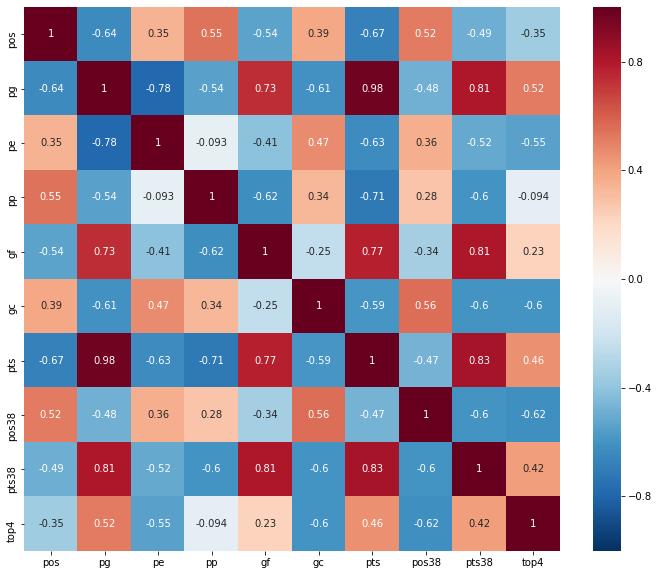

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix_RMA, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

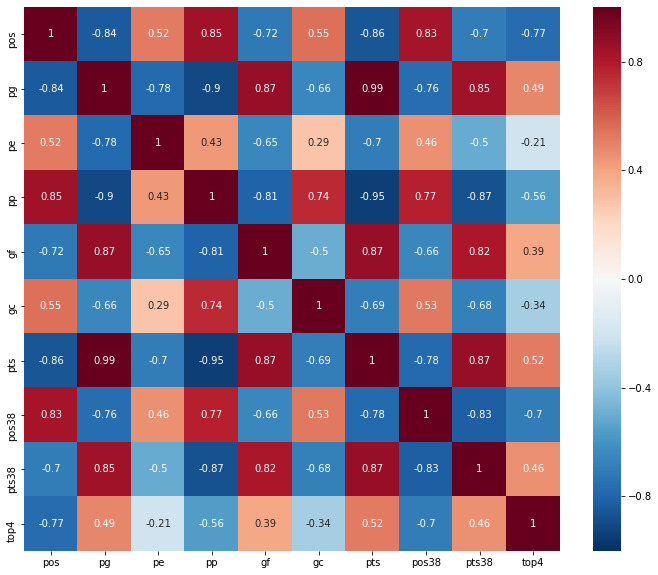

In [8]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix_BAR, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Regresión lineal simple

### Modelo

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
x = datasetRMA[['pts']].values
y = datasetRMA['pts38'].values
modeloRLS_RMA = LinearRegression() 
modeloRLS_RMA.fit(x, y)
print(modeloRLS_RMA.intercept_)
print(modeloRLS_RMA.coef_)
y_pred = modeloRLS_RMA.predict(x)
y_pred

19.160454832596322
[1.54327227]


array([70.08843967, 73.17498421, 85.52116235, 80.89134555, 93.23752369,
       91.69425142, 76.26152874, 94.78079596, 93.23752369, 87.06443462,
       77.80480101, 91.69425142, 77.80480101, 70.08843967, 77.80480101,
       83.97789008, 77.80480101, 73.17498421, 83.97789008, 63.9153506 ])

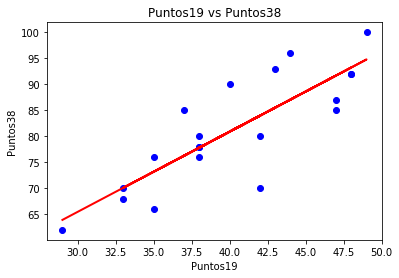

In [10]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('Puntos19 vs Puntos38')  
plt.xlabel('Puntos19')  
plt.ylabel('Puntos38') 
plt.show()

In [11]:
print('Error absoluto medio:', round(mean_absolute_error(y, y_pred),2), "puntos")  
print("Precisión con R2:", round(r2_score(y, y_pred)*100, 2), "%")

Error absoluto medio: 4.49 puntos
Precisión con R2: 68.95 %


In [12]:
x = datasetBAR[['pts']].values
y = datasetBAR['pts38'].values
modeloRLS_BAR = LinearRegression() 
modeloRLS_BAR.fit(x, y)
print(modeloRLS_BAR.intercept_)
print(modeloRLS_BAR.coef_)
y_pred = modeloRLS_BAR.predict(x)
y_pred

25.35629652930694
[1.34741882]


array([83.295306  , 94.0746566 , 80.60046835, 85.99014365, 84.64272483,
       92.72723778, 99.4643319 , 84.64272483, 95.42207543, 91.37981895,
       92.72723778, 79.25304953, 77.9056307 , 87.33756248, 85.99014365,
       61.7366048 , 56.3469295 , 65.77886128, 73.86337423, 69.82111775])

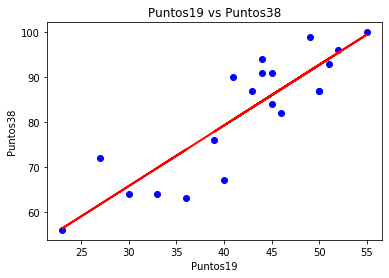

In [13]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('Puntos19 vs Puntos38')  
plt.xlabel('Puntos19')  
plt.ylabel('Puntos38') 
plt.show()

In [14]:
print('Error absoluto medio:', round(mean_absolute_error(y, y_pred),2), "puntos")  
print("Precisión con R2:", round(r2_score(y, y_pred)*100, 2), "%")

Error absoluto medio: 5.28 puntos
Precisión con R2: 75.84 %


### Predicción

In [15]:
pRMA = modeloRLS_RMA.predict([[40]])
print("Predicción:", round(pRMA[0], 2), "puntos")

Predicción: 80.89 puntos


In [16]:
pBAR = modeloRLS_BAR.predict([[40]])
print("Predicción:", round(pBAR[0], 2), "puntos")

Predicción: 79.25 puntos


## Regresión lineal múltiple

### Modelo

In [17]:
x = datasetRMA[['pos','pg','pe','pp','gf','gc','pts']].values
y = datasetRMA['pts38'].values
modeloRLM_RMA = LinearRegression() 
modeloRLM_RMA.fit(x, y)
y_pred = modeloRLM_RMA.predict(x)
y_pred

array([67.05286891, 77.84043051, 85.17677397, 89.05984907, 99.0214351 ,
       89.94688058, 81.62887874, 99.50547208, 89.26888539, 88.34740622,
       71.83709297, 86.63992794, 75.37433476, 72.83813381, 78.37987122,
       78.66654242, 78.97557057, 70.99623609, 81.00659458, 62.43681506])

In [18]:
print('Error absoluto medio:', round(mean_absolute_error(y, y_pred),2), "puntos") 
print("Precisión con R2:", round(r2_score(y, y_pred)*100, 2), "%")

Error absoluto medio: 3.24 puntos
Precisión con R2: 83.73 %


In [19]:
x = datasetBAR[['pos','pg','pe','pp','gf','gc','pts']].values
y = datasetBAR['pts38'].values
modeloRLM_BAR = LinearRegression() 
modeloRLM_BAR.fit(x, y)
y_pred = modeloRLM_BAR.predict(x)
y_pred

array([84.14306859, 95.41945349, 85.36379595, 83.83433313, 83.82073546,
       91.73312564, 98.10043371, 92.61361841, 95.5786441 , 93.35319975,
       93.59234754, 77.71302468, 78.89906932, 87.04882663, 80.47174228,
       61.44342672, 59.21635626, 67.94373841, 67.96832335, 64.74273658])

In [20]:
print('Error absoluto medio:', round(mean_absolute_error(y, y_pred),2), "puntos") 
print("Precisión con R2:", round(r2_score(y, y_pred)*100, 2), "%")

Error absoluto medio: 4.69 puntos
Precisión con R2: 81.95 %


### Predicción

In [21]:
pRMA =modeloRLM_RMA.predict([[2, 11, 7, 1, 36, 12, 40]])
print("Predicción:", round(pRMA[0], 2), "puntos")

Predicción: 83.85 puntos


In [22]:
pBAR =modeloRLM_BAR.predict([[1, 12, 4, 3, 49, 23, 40]])
print("Predicción:", round(pBAR[0], 2), "puntos")

Predicción: 77.95 puntos


## Árboles de decisión de clasificación

### Modelo

In [23]:
x = datasetRMA[['pos','pg','pe','pp','gf','gc','pts']].values
y = datasetRMA['top4'].values
from sklearn.tree import DecisionTreeClassifier
modelo_arbol_RMA = DecisionTreeClassifier()
modelo_arbol_RMA.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
x = datasetBAR[['pos','pg','pe','pp','gf','gc','pts']].values
y = datasetBAR['top4'].values
modelo_arbol_BAR = DecisionTreeClassifier()
modelo_arbol_BAR.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "arboles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "imagenes", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

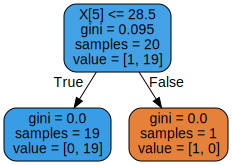

In [26]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modelo_arbol_RMA, out_file=os.path.join(IMAGES_PATH, "arbol_RMA.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol_RMA.dot"))

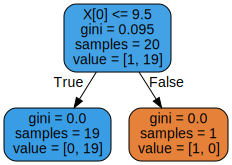

In [27]:
export_graphviz(modelo_arbol_BAR, out_file=os.path.join(IMAGES_PATH, "arbol_BAR.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol_BAR.dot"))

### Predicción

In [28]:
modelo_arbol_RMA.predict_proba([[2, 11, 7, 1, 36, 12, 40]])

array([[0., 1.]])

In [29]:
modelo_arbol_BAR.predict_proba([[1, 12, 4, 3, 49, 23, 40]])

array([[0., 1.]])